# Applied Statistics : E-news Express Project

### Problem Statement
Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express believe that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to decide to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content compared to the old page. To test the effectiveness of the new landing page in gathering new subscribers, the Data Science team experimented by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language?
Is the time spent on the new page the same for the different language users?


### Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - language chosen by the user to view the landing page

### Let us start by importing the required libraries

In [30]:
# libraries for the data manipulation
import numpy as np
import pandas as pd
# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Library to help with statistical analysis
import scipy.stats as stats
# import the required test function
from scipy.stats import chi2_contingency

%matplotlib inline
from statsmodels.stats.proportion import proportions_ztest


### Understanding the structure of the data

In [3]:
# code to mount the drive for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Code to read the data
file_path ='/content/drive/My Drive/Colab Notebooks/abtest.csv'
df = pd.read_csv(file_path)

In [42]:
# Code to view the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
# shape will display the number of rows and columns in dataframe
df.shape

(100, 6)

#### Observations:The dataset has 100 rows and 6 columns


In [7]:
# code to print the summary of the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:There are attributes of types int, float and object in the data.We can observe that there are 1 attributes of type int, 4 attributes of type object and 1 attribute of type float.All the columns have 100 observations which can be inferred that there are not any null values present in the data


In [8]:
# Code to check for missing values and count the missing values
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


#### Observations:There are no missing values in the dataset


In [40]:
# Code to check the statistical summary
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Observations:Minimum time spent on the page is 0.19 minutes. Average time time spent on the page is 5.37 minutes. Maximim time time spent on the page is 10.71 minutes


### Exploratory Data Analysis (EDA)

### Univariate Analysis

Observation on Numerical Variable time_spent_on_the_page

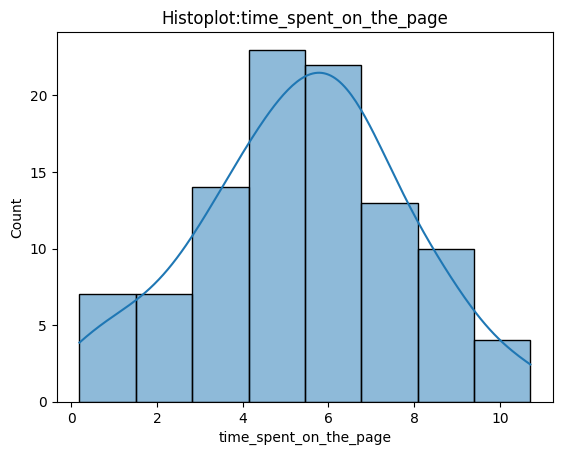

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


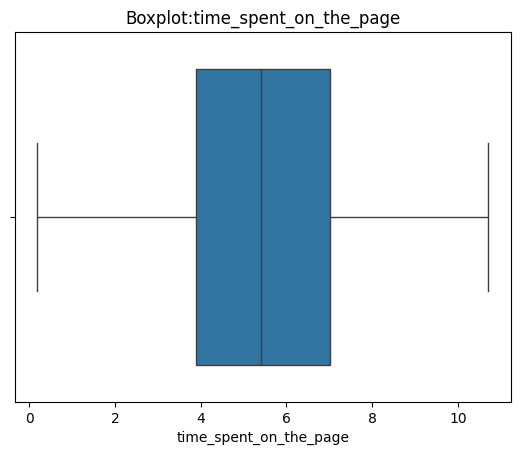

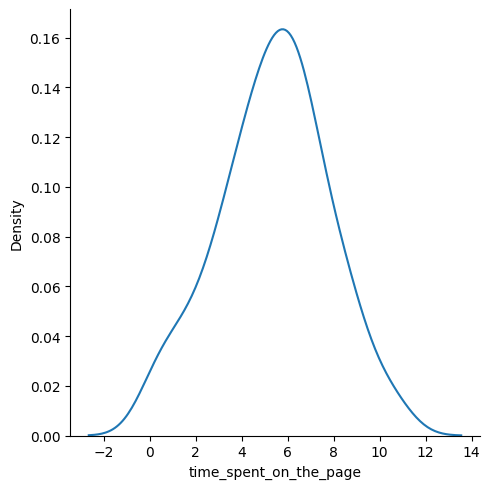

In [34]:

# Histoplot
plt.title('Histoplot:time_spent_on_the_page')
sns.histplot(data=df,x='time_spent_on_the_page',kde=True)
plt.show()
#Boxplot
plt.title('Boxplot:time_spent_on_the_page')
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()
#Distplot
sns.displot(data=df,x='time_spent_on_the_page',kind='kde')
plt.show()



The distribution is symmetrical. There are no outliers for this column. Mean value for this column is 5.377800

Observation on Categorical Value group

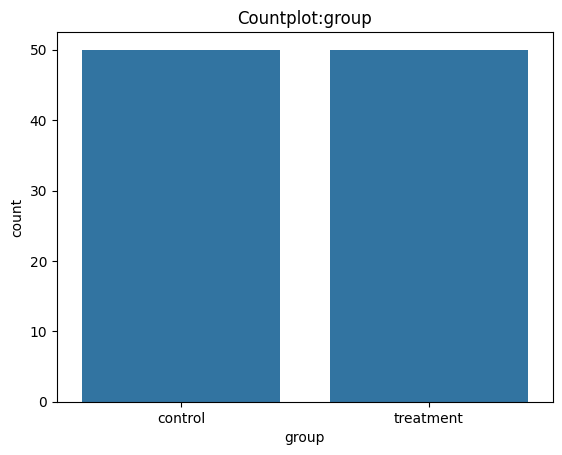

In [8]:
# Countplot
plt.title('Countplot:group')
sns.countplot(data=df,x='group')
plt.show()

The sample has an equal weightage for control and treatment group

Observation on Categorical Value converted


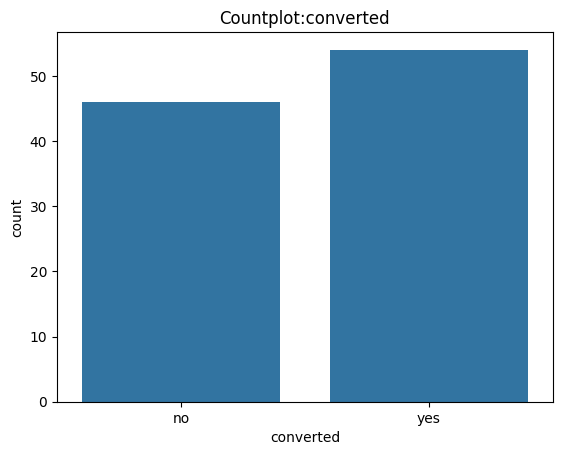

In [41]:
# Countplot
plt.title('Countplot:converted')
sns.countplot(data=df,x='converted')
plt.show()

Number of users who are converted are more than the user who are not converted

Observation on Categorical Value language_preferred

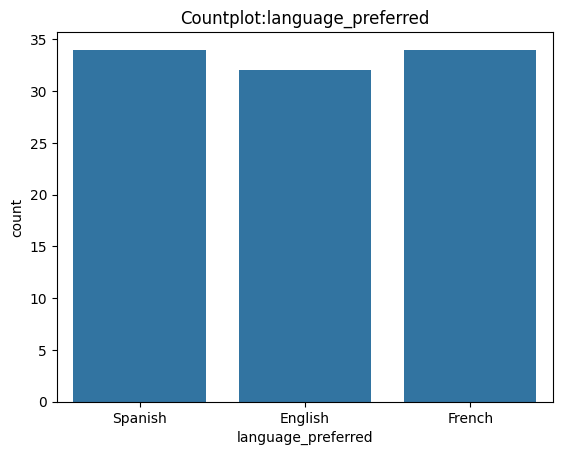

In [11]:
# Countplot
plt.title('Countplot:language_preferred')
sns.countplot(data=df,x='language_preferred')
plt.show()

Users with preferred language as Spanish and French are slightly higher than users with preferred language as English

### Bivariate Univariate Analysis

Observation on numerical variable and categorical variables - converted and time_spent_on_the_page

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='converted', ylabel='time_spent_on_the_page'>

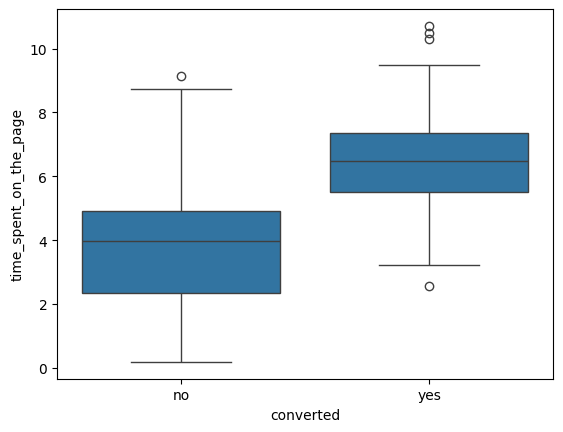

In [44]:
#Boxplot
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page')

For the sample of 100 users, the mean time spent on the page for converted users is higher than the mean time spent for non converted users. There are some outliers present in the sample data

Observation on numerical and categorical variables time_spent_on_the_page and landing_page

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


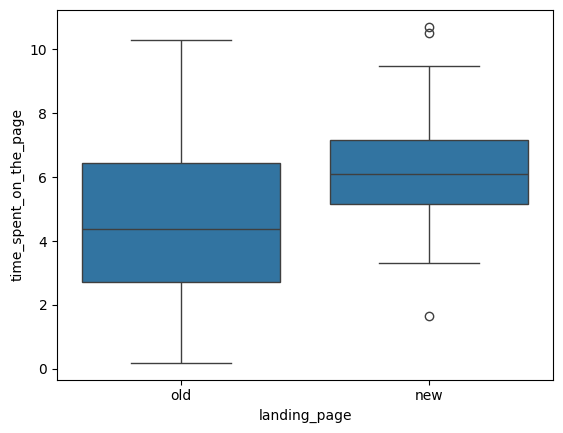

In [66]:
#boxplot
sns.boxplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page')
plt.show()

For the sample of 100 users, the  time spent on the new landing  page for  is higher than the mean time spent on old landing page. There are some outliers present in the distribution when plotted for landing_page and time_spent_on_the_column.

Observation on numerical and categorical variables time_spent_on_the_page and language_preferred

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


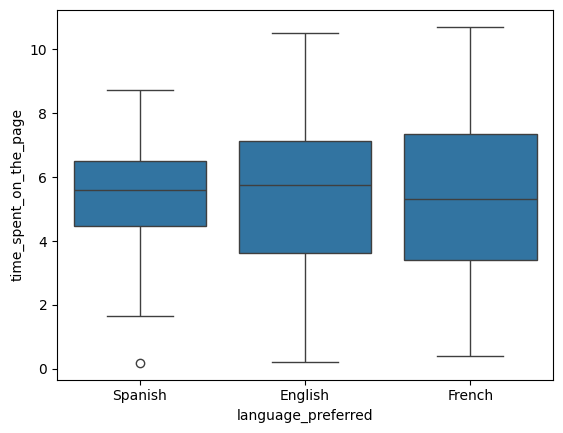

In [62]:
#boxplot
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()


For the sample of 100 users, the  time spent for the English language  is higher than the  time spent for users with preferred language Spanish and . T

Observation on categorical variables - group   and time_spent_on_the_page

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


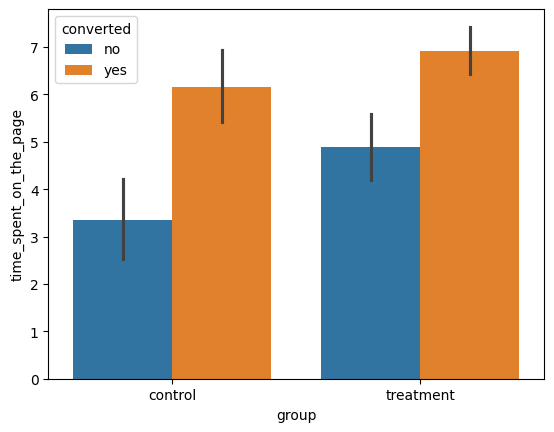

In [67]:
#barplot
sns.barplot(data = df, x = 'group', y = 'time_spent_on_the_page', hue = 'converted')
plt.show()

It appears that more people converted to subscribers in the treatment group comapred to the control group. Additionally, users in the treatment group spent more time on the page as opposed to participants in the control group.

Observation on categorical variables - landing_page,converted and language_preferred

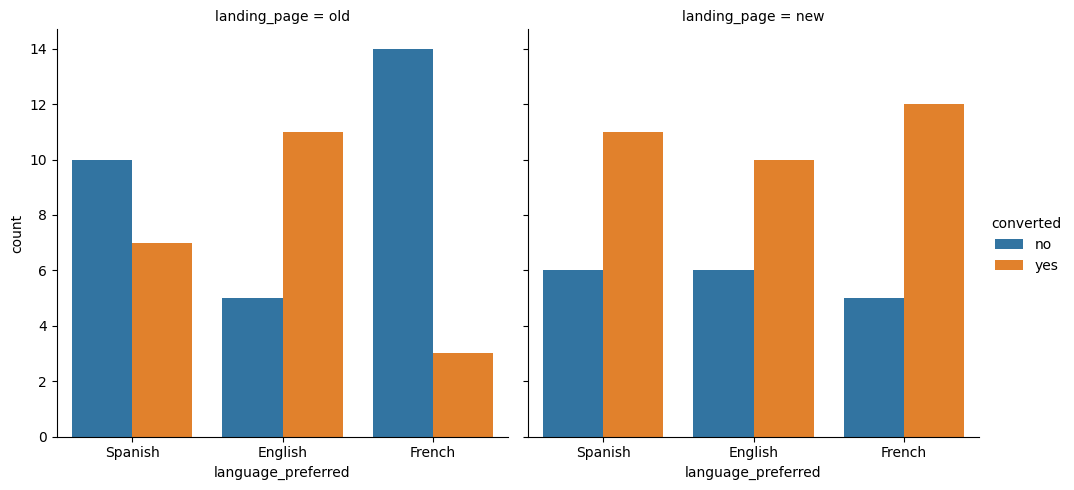

In [55]:
#catplot
sns.catplot(data = df, x = 'language_preferred', hue = 'converted', col = 'landing_page', kind = 'count')
plt.show()

Users who preferreed Spanish and French did not get converted to a subscriber when viewing the old landing page. However, users of all language preferences converted to subscribers when viewing the new landing page.

### **EDA Insights**

Minimum time spent on the page is 0.19 minutes. Average time time spent on the page is 5.37 minutes. Maximim time time spent on the page is 10.71 minutes
There are no outliers for this column time_spent_on_the_page.

For the sample of 100 users, the mean time spent on the page for converted users is higher than the mean time spent for non converted users. There are some outliers present in the sample data.

 For the sample of 100 users, the  time spent on the new landing  page for  is higher than the mean time spent on old landing page. There are some outliers present in the distribution when plotted for landing_page and time_spent_on_the_column.

 It appears that more people converted to subscribers in the treatment group comapred to the control group. Additionally, users in the treatment group spent more time on the page as opposed to participants in the control group.
Users who preferreed Spanish and French did not get converted to a subscriber when viewing the old landing page. However, users of all language preferences converted to subscribers when viewing the new landing page.

### **Question**: Do the users spend more time on the new landing page than the old landing page?

#### Visualize data

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Sample mean = 5.377800000000001


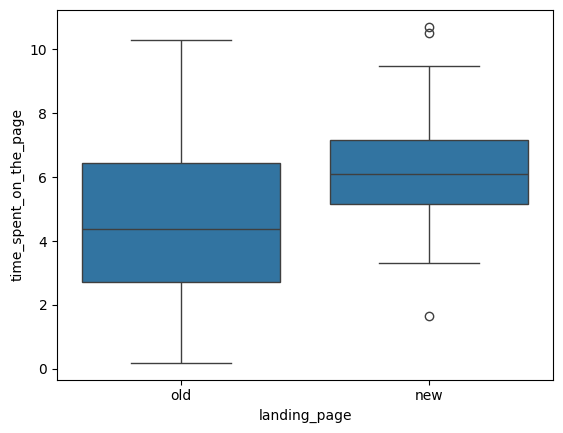

In [16]:
# Visual analysis of the distribution of the time spent by users in landing page
sns.boxplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page')
print('Sample mean =',df['time_spent_on_the_page'].mean())


* The distribution of the mobile internet usage time is skewed to the right
* The average time spent on the new page is greater than the old page.
* Do the users spend more time on the new landing page than the old landing page? To determine this with significance, we will test the difference using a statistical test.

### Step 1: Define null and alternative hypotheses

We want to see if users spend more time on the new landing page than the old landing page?.

**H0:  Mean time spent by users on the old landing page is equal to Mean time spent by users on the new landing page.**

**Ha:  Mean time spent by users on the new landing page is greater than the Mean time spent by users spent on the old landing page.**

Let  μ1  be the mean time spent by users on old landing page and
μ2 be the mean time spent by users on new landing page

Mathematically, the above formulated hypotheses can be written as:

H0:μ1 = μ2

Ha:μ1 < μ2




### Step 2: Select Appropriate test

This is a case of a two-tailed test for the significance of a single mean. As the population standard deviation is unknown, a one-sample t-test will be appropriate to test the formulate hypotheses.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4:Collect and prepare data

In [18]:
#Code to get the time_spent_on_the_page for old and new landing page
time_old= df[df['landing_page']=='old']['time_spent_on_the_page']
time_new= df[df['landing_page']=='new']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [36]:
from scipy.stats import ttest_rel

# Code to find the p-value
test_stat, p_value  = ttest_rel( time_new, time_old,alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.00029910900937037973


### Step 6: Compare the p-value with α

In [23]:
# Code to arrive the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.00029910900937037973 is less than the level of significance, we reject the null hypothesis.


### Step 7: Inference

At 5% significance level, we  reject the null hypothesis. Hence we have enough statistical evidence to say that the mean time spent by users on the new landing page is greater than the mean time spent by users spent on the old landing page.

### **Question**:Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

#### Visualize data

In [64]:
#Code to get landing page based on old and new for all values of converted cloumn
pd.crosstab(df['landing_page'],df['converted'])

converted,no,yes
landing_page,,
new,17,33
old,29,21


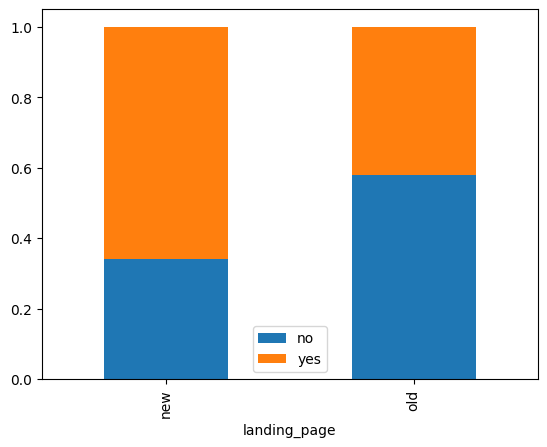

In [65]:
#Visual analysis of the distribution of the converted and landing page
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar",stacked=True)
plt.legend()
plt.show()

It is observed that users on the new landing page are more likely to convert to subscribers than users on the old landing page.

### Step 1: Define null and alternative hypotheses

We want to see Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

**$H_0:$ The proportion of users who visit the landing page and get converted for the new page  is equal to the proportion of users who visit the landing page and get converted for the olde page.**

**$H_a:$ The proportion of users who visit the landing page and get converted for the new page  is not  equal to the proportion of users who visit the landing page and get converted for the olde page**

### Step 2: Select Appropriate test

The formulated hypotheses are concerned with proportions. A test of proportions can be used to analyse the hypotheses and draw a conclusion. We shall use a Proportions Z test for this problem.

## Step 3: Decide the significance level

Here, we select α = 0.05.

## Step 4: Data Preparation

In [29]:
# code to get the nu,ner of  conversions for old and new landing page
converted_oldcount= df[df['landing_page']=='old'].converted.value_counts()['yes']
converted_newcount= df[df['landing_page']=='new'].converted.value_counts()['yes']
print('The numbers of converted for old and new landing page are {0} and {1} respectively'.format(converted_oldcount, converted_newcount))

old_count= df[df['landing_page']=='old'].shape[0]
new_count= df[df['landing_page']=='new'].shape[0]

print('The numbers of counts for old and new landing pages are {0} and {1} respectively'.format(old_count, new_count))



The numbers of converted for old and new landing page are 21 and 33 respectively
The numbers of counts for old and new landing page are 50 and 50 respectively


## Step 5: Calculate the p-value

In [31]:
# code to find the p-value using proportion_ztest
stat, pval = proportions_ztest([converted_newcount, converted_oldcount] , [new_count,old_count], alternative = 'two-sided')

# code to print the p-value
print('The p-value is '+ str(pval))

The p-value is 0.016052616408112556


## Step 6: Compare the p-value with $\alpha$

In [33]:
# code to print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


## Step 7: Inference

Since the pvalue is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page

### **Question**:Does the converted status depend on the preferred language?

#### Visualize data

In [26]:
# Code to create a contingency table to tabulate the frequencies of the two categorical variables
pd.crosstab(df.language_preferred,df.converted,margins=True)

converted,no,yes,All
language_preferred,,,
English,11,21,32
French,19,15,34
Spanish,16,18,34
All,46,54,100


* There are a total of 100 users in the sample
* 21 out of 54 users are converted with preferred language English.
* 15 out of 54 users are converted with preferred language French
* 18 out of 54 users are converted with preferred language Spanish

To visualize the relationship between the two categorical variables, we can plot a stacked bar chart.

- A stacked bar chart, also known as a stacked bar graph, is a graph that is used to break down and compare parts of a whole
- Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole


<Axes: xlabel='converted'>

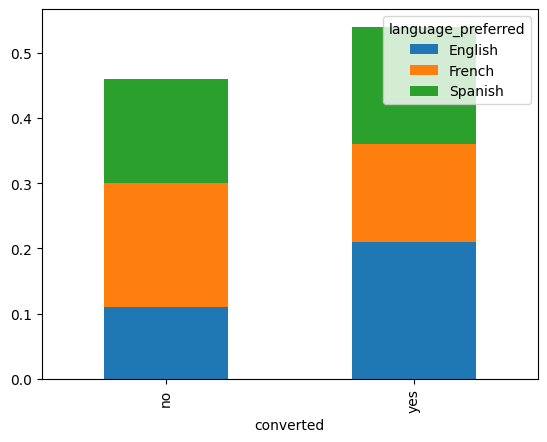

In [27]:
# code to visualize the data in graph
pd.crosstab(df.converted,df.language_preferred,normalize=True).plot(kind='bar',stacked=True)

* The proportion of Spanish is higher than the other languages for Converted users
* Based on the sample data, we can infer that the proportion of converted users is higher for one language , but is this difference significant enough to conclude that converted status is dependent on the preferred_language?

### Step 1: Define null and alternative hypotheses

**The null and alternative hypothesis for the above problem**

$H_0:$ The converted status and the preferred language are independent of each other

$H_a:$ The converted status and the preferred language are dependent on each other

### Step 2: Select Appropriate test

To test the dependence between two categorical variables, a Chi-square test for independence is used.

## Step 3: Decide the significance level

Here, we select α = 0.05.

## Step 4: Data Preparation

In [29]:
# Code to create a contingency table to perform the test
contingency_table = pd.crosstab(df.language_preferred, df.converted)
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


## Step 5: Calculate the p-value

In [31]:
# calculate the test results
chi, p_value, dof, expected = chi2_contingency(contingency_table)

print("Test Statistic =",chi)
print("p-value =",p_value)
print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected)

Test Statistic = 3.0930306905370832
p-value = 0.2129888748754345
Degrees of freedom = 2
Expected frequencies 
 [[14.72 17.28]
 [15.64 18.36]
 [15.64 18.36]]


## Step 6: Compare the p-value with $\alpha$

In [32]:
# code to print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


## Step 7: Inference

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis. This means that the converted status is independent of language preferred.

### **Question**:Is the mean time spent on the new page same for the different language users?

#### Visualize data

In [15]:
#code to get
df_newpage = df[df['landing_page'] == 'new']
df_newpage.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


Sample mean = 6.2232


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


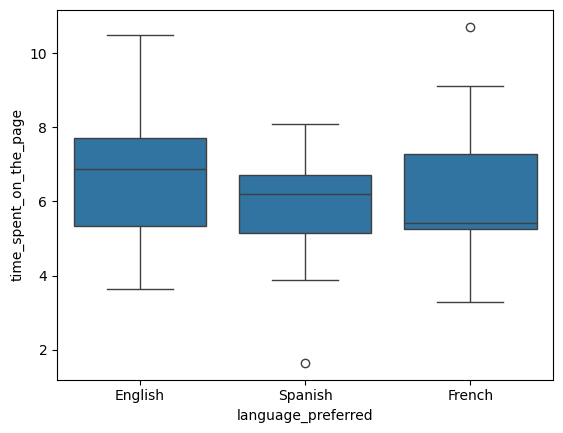

In [16]:
 #Visual analysis of the distribution of the time spent by users in new landing page
sns.boxplot(data = df_newpage, x = 'language_preferred', y = 'time_spent_on_the_page')
print('Sample mean =',df_newpage['time_spent_on_the_page'].mean())


### Step 1: Define null and alternative hypotheses


H
0
:
  The mean time spent on the new lading page is the same across all preferred langauges.

H
a
:
 At least one of the mean times spent on the new landing page is different amongst the preferred languages.



### Step 2: Select Appropriate test

his is a problem, concerning three population means. One-way ANOVA is an appropriate test here provided normality and equality of variance assumptions are verified.

**One-way ANOVA test**

In a one-way ANOVA test, we compare the means from several populations to test if there is any significance difference between them. The results from an ANOVA test are most reliable when the assumptions of normality and equality of variances are satisfied.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

## Step 3: Decide the significance level

Here, we select α = 0.05.

## Step 4: Data Preparation


**Shapiro-Wilk’s**

H
0
:
  The mean time spent on the new page follows a normal distribution

H
a
:
 The mean time spent on the new page does not follow a normal distribution

In [19]:
# code to perform the Shapiro-Wilk's test and get the p-value
from scipy import stats

w, p_value = stats.shapiro(df_new['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040040364746845


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

**Levene’s test**

The null and alternative hypotheses can be formulated as:

Let μ1,μ2,μ3
 be the means of time spent on the new landing page for languages English, Spanish and French respectively.

> $H_0$ : μ1 = μ2 = μ3. <br>
> $H_a$ : At least one of the  average time of the new landing page is different among the language preferences.

## Step 5: Calculate the p-value

In [20]:
# code to get the p-value based on  levene function from scipy.stats library for this test
statistic, p_value = stats.levene(df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page'],
                            df_new[df_new['language_preferred']=='French']['time_spent_on_the_page'],
                            df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

## Step 6: Compare the p-value with α


In [24]:
# code to print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


In [22]:
# code to create separate variables to store the weightlosses with respect to the three diet-plans
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']


In [23]:
# code to Perform a one-way ANOVA test and determine the p-value
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.

## Step 7: Inference

At 5% significance level, we fail to reject the null hypothesis. Hence we don't have enough statistical evidence to say that at least one time average on the new landing page is different among the language preferences.

## Conclusion


To answer the question Do the users spend more time on the new landing page than the old landing page? At 5% significance level, we reject the null hypothesis. Hence we have enough statistical evidence to say that the mean time spent by users on the new landing page is greater than the mean time spent by users spent on the old landing page.


To answer the question Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?, having the pvalue < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the conversion rate (the proportion of users who visit the landing page and get converted) for the new landing page is greater than the conversion rate for the old landing page

For the question, Does the converted status depend on the preferred language?
As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis. This means that the converted status is independent of language preferred.

For the question, Is the mean time spent on the new page same for the different language users?As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.At 5% significance level, we fail to reject the null hypothesis. Hence we don't have enough statistical evidence to say that at least one time average on the new landing page is different among the language preferences.

## Business Recommendation


Based on the EDA and statistical tests, We can recommend that News Express can implement the new landing page.

The time spent on the new landing page is greater than the time spent on the old landing page which is the  evidence that users are liking it.

Also, there is not any  significant difference between the average time spent on the new page across the preferred languages, the conversion rate appears to be the same for the sample.

 We can recommend News Express to consider adding more languages to get more subscribers.

 The new landing page has an increased conversion rate, hence , focus should be towards new landing page to attract new users.